<a href="https://colab.research.google.com/github/sivaprakasha-datascientist/Disease-Prediction/blob/main/Potato_Disease_Prediction_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/drive/MyDrive/VillageDisease",  # Absolute or relative path
    seed=123,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 1853 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

58

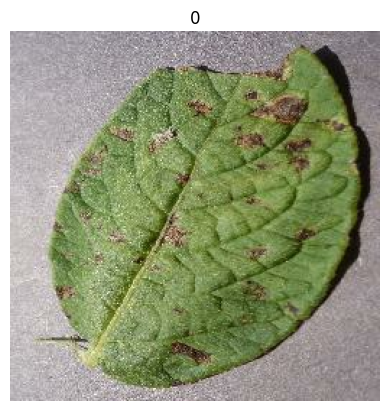

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(int(labels_batch[0]))
    plt.axis("off")

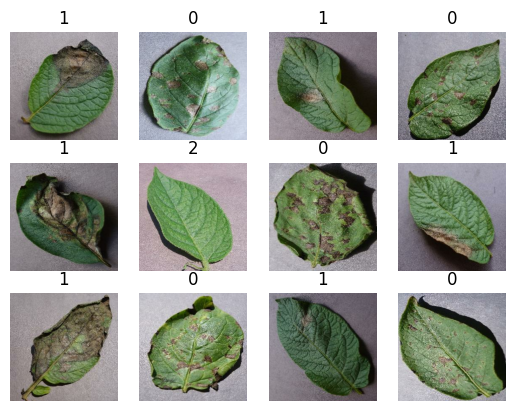

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(int(labels_batch[i]))
        plt.axis("off")

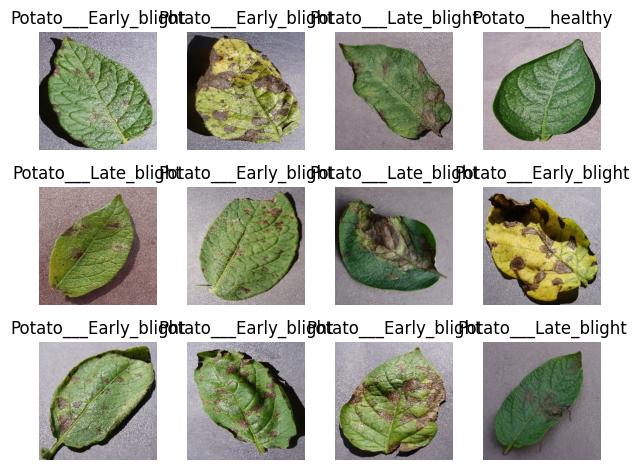

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])  # Use indexing instead of calling
        plt.axis("off")

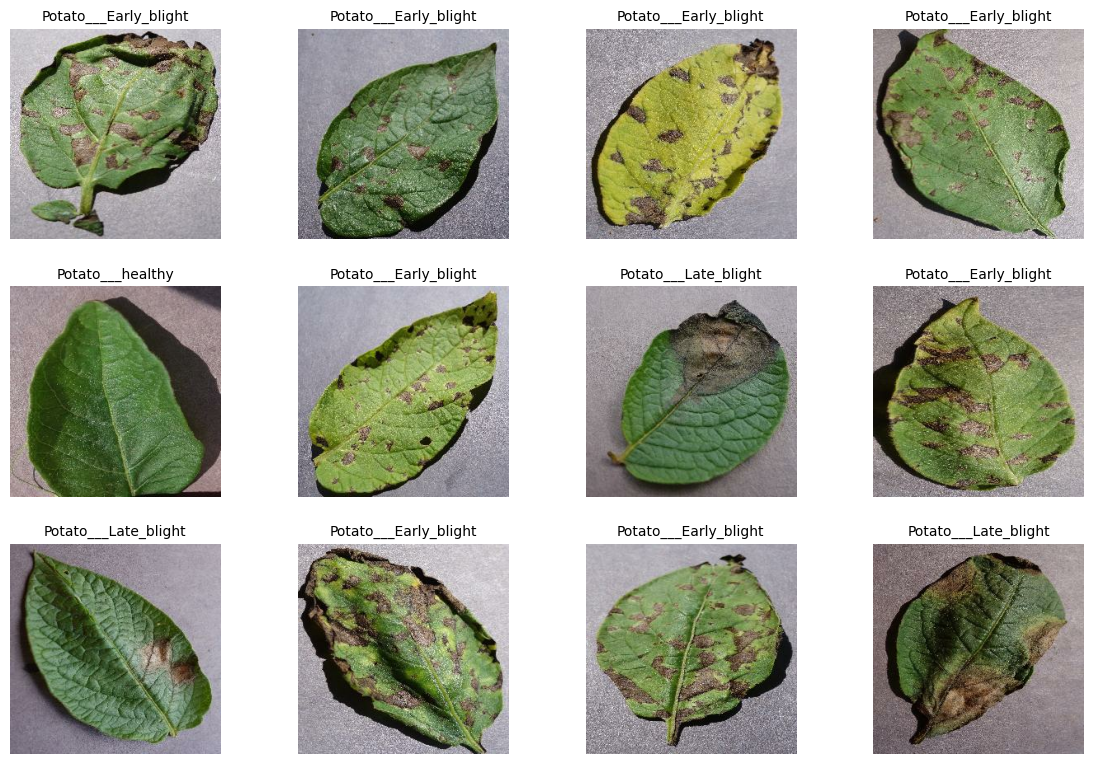

In [ ]:
import matplotlib.pyplot as plt

for image_batch, labels_batch in dataset.take(1):
    plt.figure(figsize=(12, 8))  # Adjust figure size
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]], fontsize=10)  # Reduce font size
        plt.axis("off")
    plt.tight_layout(pad=2.0)  # Add space between titles and images
    plt.show()


In [ ]:
len(dataset)

58

80% data is used for the model training
where 0.8 * 58 = 46
dataset.take(46)

In [ ]:
train_ds = dataset.take(46)
len(train_ds)

46

In [ ]:
test_ds = dataset.skip(46)
len(train_ds)

12

In [ ]:
val_size = 0.1
len(dataset)*val_size

5.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

46

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])


In [ ]:
data_augmentation = tf.keras.Sequential([
                     layers.experimental.processing.RamdomFlip("horizontal_and_vertical"),
                     layers.experimental.processing.RandomRotation(0.2),
                     ])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Correct function name
    layers.RandomRotation(0.2)                    # Adjust rotation as needed
])